## Semantic Similarity with diffrent Languages 

For In depth knowledge refer :https://tfhub.dev/google/universal-sentence-encoder-multilingual/3


In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np

In [2]:
tf.compat.v1.enable_eager_execution() ## Use with TF1

In [3]:
model = hub.load("https://tfhub.dev/google/universal-sentence-encoder-multilingual/3")

In [4]:
def generate_embeddings(text):
    '''Generates the embedding for the query'''       
    embedding = model(text)
    return embedding

In [5]:
# Pick a threshold which is the minimum amount of percentage change which we are looking for
limit = 10

def calc_diff(embeds):
    # Calculate the % change for each dimension
    diff = [(a - b)/a for a,b in zip(embeds[0], embeds[1])]
    # Get the positive values for each element on the list
    diff = [abs(x) for x in diff]

    value = []
    dim = []
    avgs = []
    res = {}
    for n,v in enumerate(diff):
        avgs.append(v)
        if v > limit or v < -limit:
            value.append(v)
            dim.append(n)
    avg = sum(avgs) / len(avgs)
    res["dims"] = dim
    res["avg"] = avg
    res["value"] = value

    return(res)

In [8]:
def charts(results, embeds, messages):
    plt.figure(figsize=(20, 14))
    y_pos = np.arange(len(results["dims"]))
    plt.tight_layout(pad=0.9, w_pad=0.5, h_pad=1.0)
    plt.subplot(2, 1, 1)
    p=plt.bar(y_pos, results["value"], align='center', alpha=0.5, color='black')
    plt.xticks(y_pos, results["dims"])
    plt.ylabel('Percent difference', fontsize=25)
    plt.title('Dimensions with change > %s percent' % (limit), fontsize=25)

    plt.xlabel("Dimemsions count: %s,Average change: %r" % (len(results["dims"]), (results["avg"], 2)),
               fontsize=18)

    plt.subplot(2, 1, 2)
    plt.scatter(embeds[0], embeds[1], marker="o", c=["black"], s=25)
    plt.title('Comparing similarity', fontsize=24)
    plt.xlabel("%s - x axis \n %s - y axis" % (messages[0], messages[1]), fontsize=25, 
               color="black", wrap=True)

    plt.show()


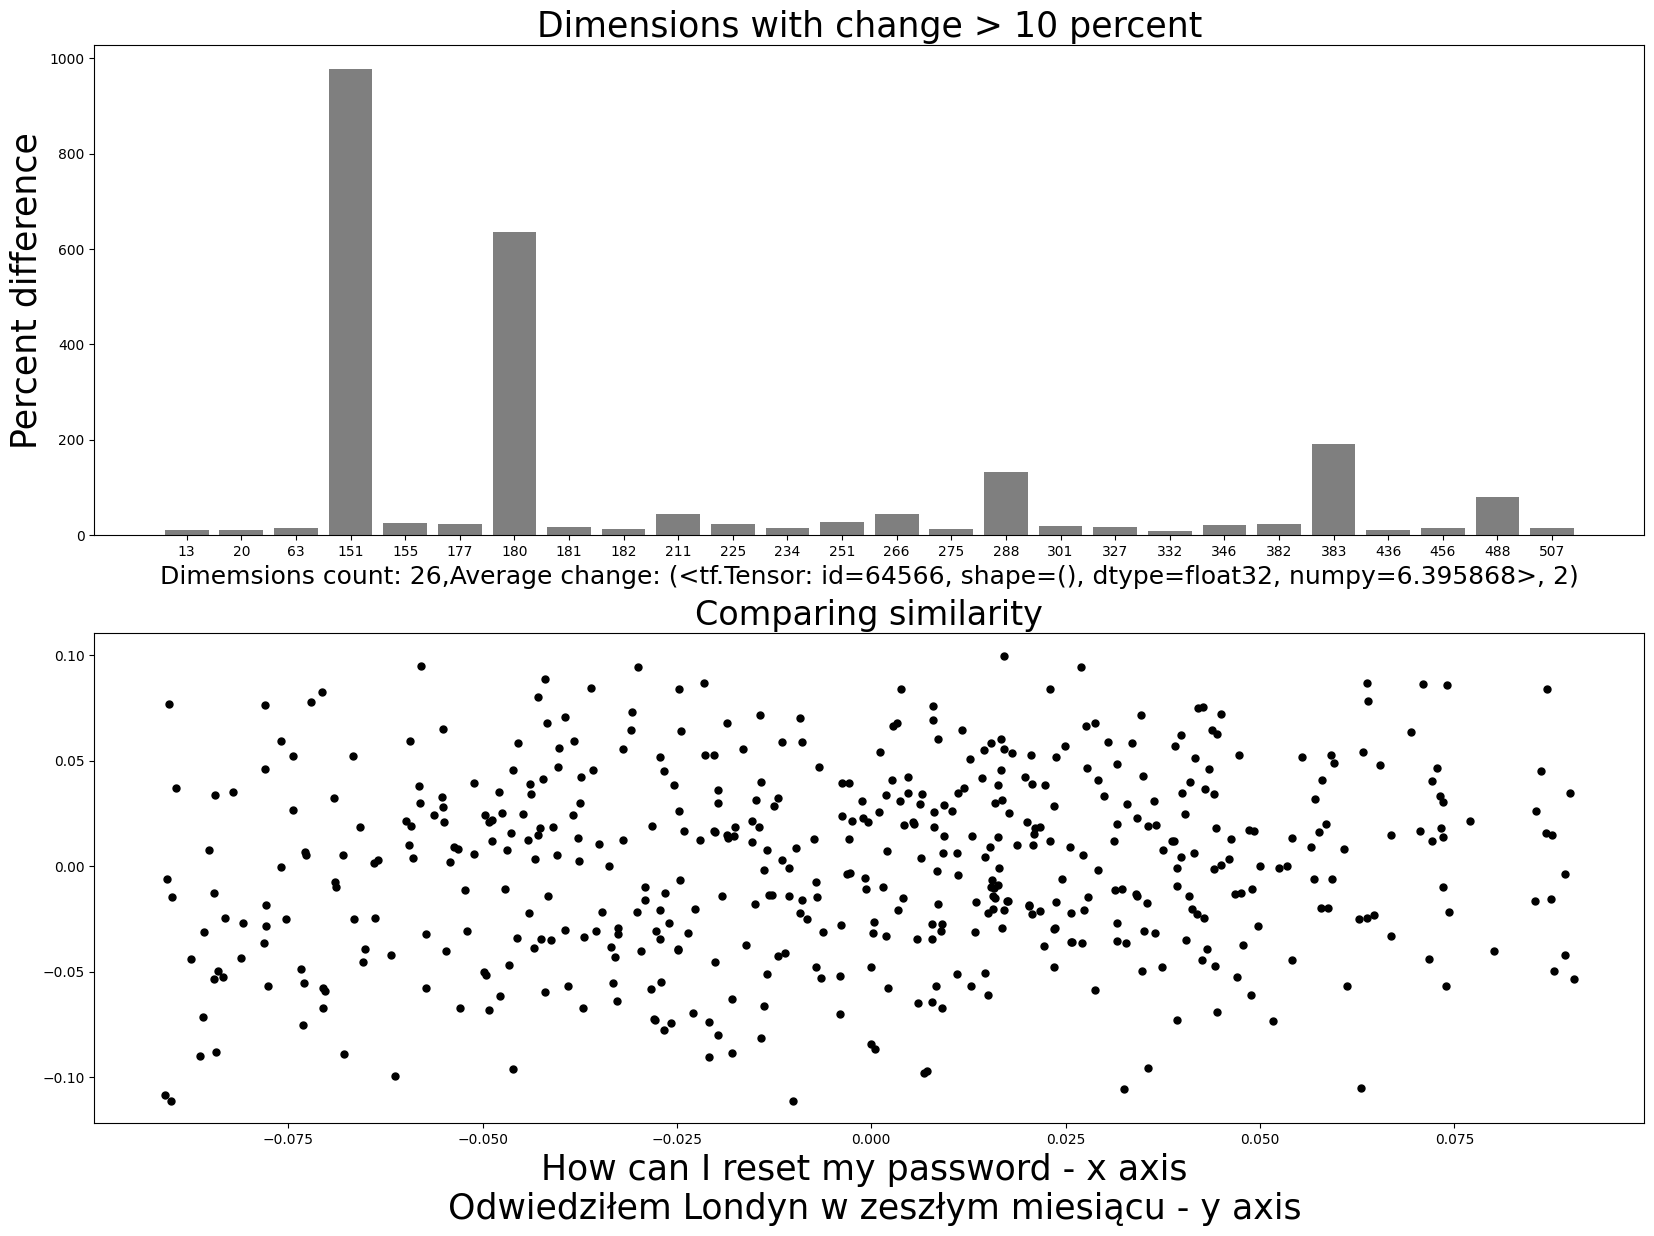

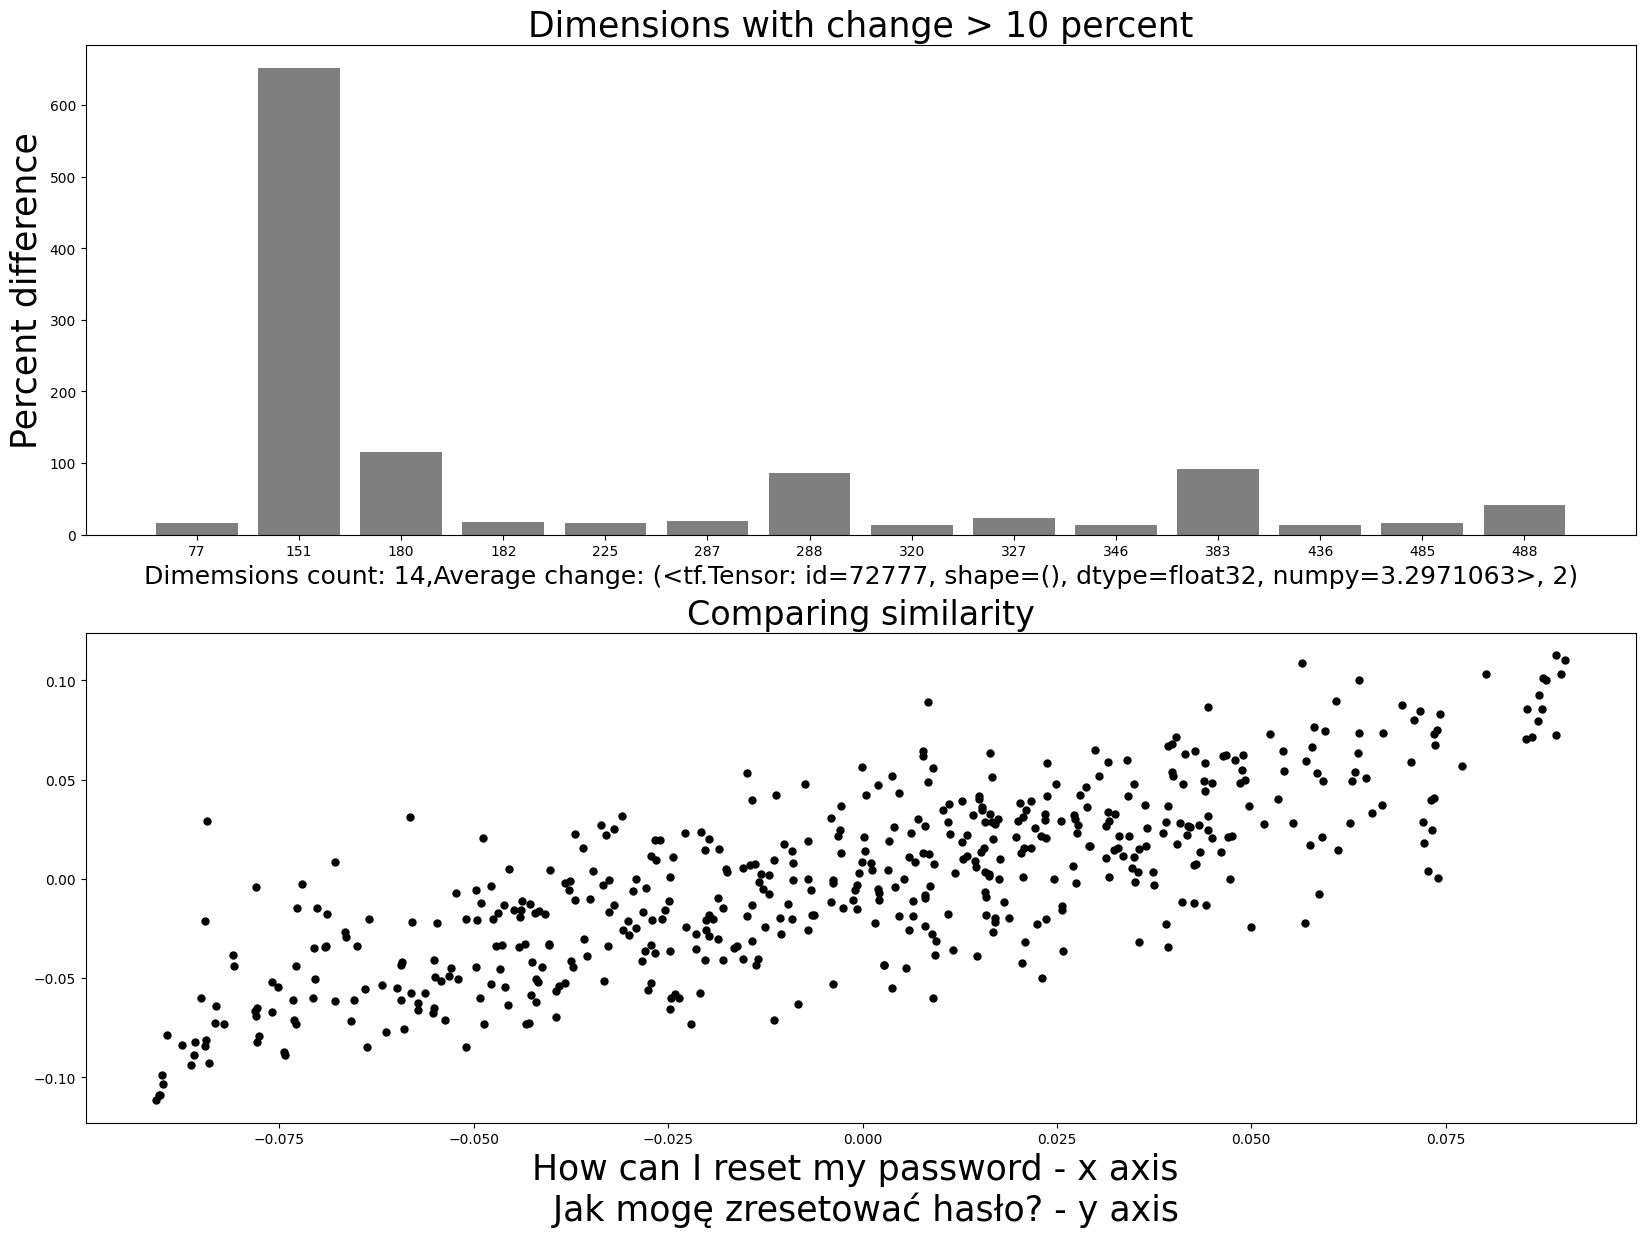

In [11]:
# Replace these examples with your own sentences

test1="Odwiedziłem Londyn w zeszłym miesiącu" ##I visited london last month
test2="Jak mogę zresetować hasło?" ## How can I reset my password

sentences = [
    ["How can I reset my password", test1], 
    ['How can I reset my password',test2],
            ]

for sentence in sentences:
    embeds = generate_embeddings(sentence)
    diffs = calc_diff(embeds)
    charts(diffs, embeds, sentence)
    

Above Charts shows that with 
1. test1 the data points are scatter hence no similarity between sentence
2. test2 the data points are in one direction that means there is similarity between both sentence 
